# Descriptive Statistics

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
#reading cleaned data file
data=pd.read_csv('C:/Users/Anne_2/Documents/Ironhack/Python CustomerAnalysis/Customer-Analysis-Car-Insurance/marketing_customer_analysis_clean.csv')

In [96]:
#displaying data
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,noincome
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [97]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'noincome'],
      dtype='object')

## Demographics

In [6]:
#How many customer records?
data.shape

(9134, 24)

F    0.509963
M    0.490037
Name: gender, dtype: float64


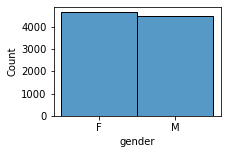

In [35]:
#Gender
print(data.gender.value_counts(normalize = True))
plt.figure(figsize=(3,2))
sns.histplot(data.gender)
plt.show()

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64


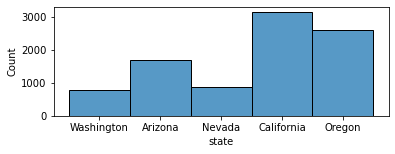

In [22]:
#state
print(data.state.value_counts(normalize = True))
plt.figure(figsize=(6,2))
sns.histplot(data.state)
plt.show()

Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: education, dtype: float64


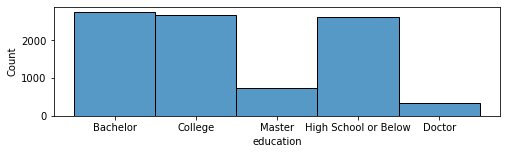

In [28]:
#education
print(data.education.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.education)
plt.show()

Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: employmentstatus, dtype: float64


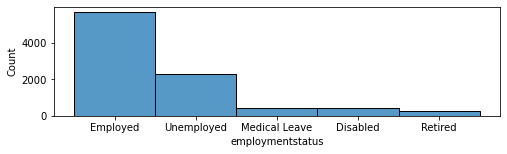

In [36]:
#employement status
print(data.employmentstatus.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.employmentstatus)
plt.show()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64


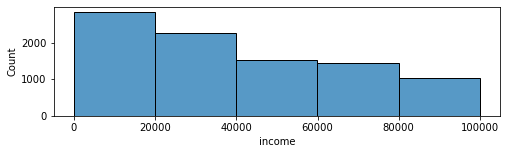

In [39]:
#income
print(data.income.describe())
plt.figure(figsize=(8,2))
sns.histplot(data.income, bins=5)
plt.show()

In [71]:
#checking 0 as minimum income - is it from status unemployed or is it missing values?
data['noincome']=data['income']
data['noincome']=np.where(data['income']==0, 1, 0)
pd.crosstab(data['noincome'], data['employmentstatus'])

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
noincome,,,,,
0,405,5698,432,282,0
1,0,0,0,0,2317


In [74]:
#checking income by employementstatus
data.groupby(['employmentstatus'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
employmentstatus,,,,,,,,
Disabled,405.0,20045.582716,5350.680175,10097.0,16061.00,20178.0,24392.00,29981.0
Employed,5698.0,56384.884521,22066.049694,20009.0,37230.00,55593.0,74015.00,99981.0
Medical Leave,432.0,20292.770833,5454.673575,10037.0,16095.25,20480.5,24598.25,29957.0
Retired,282.0,20554.960993,5476.359449,10180.0,15634.50,21073.0,25147.00,29692.0
Unemployed,2317.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


#### disabled, medical leave, retired don't differ much in income but all three much lower than income for employed

In [76]:
#checking income by education
data.groupby(['education'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,2748.0,37426.814774,30612.614417,0.0,0.0,33353.5,62902.00,99981.0
College,2681.0,37357.165983,29962.125533,0.0,0.0,33485.0,60944.00,99961.0
Doctor,342.0,42353.128655,28413.578311,0.0,21986.0,38254.0,67709.25,99443.0
High School or Below,2622.0,35583.929443,31115.046078,0.0,0.0,30514.0,60981.75,99874.0
Master,741.0,44768.187584,27984.136110,0.0,23823.0,42557.0,66334.00,99960.0


#### moderate income differences by education - doctor and master seem less unlikely to be unemployed/income of 0 and with higher mean, but max income in all categories present

In [85]:
#checking employmentstatus by education
pd.crosstab(data['education'], data['employmentstatus'], normalize='index')

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,0.044032,0.619360,0.045852,0.032023,0.258734
College,0.036554,0.620664,0.054084,0.038046,0.250653
Doctor,0.064327,0.728070,0.049708,0.002924,0.154971
High School or Below,0.045004,0.582761,0.043860,0.027460,0.300915
Master,0.062078,0.748988,0.039136,0.025641,0.124157


#### unemployment highest for lowest educational level

In [77]:
#checking income by state
data.groupby(['state'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Arizona,1703.0,37405.402231,30131.906850,0.0,0.00,34337.0,61085.50,99845.0
California,3150.0,37558.946667,30510.334698,0.0,0.00,33096.5,62461.75,99981.0
Nevada,882.0,38369.605442,30365.994106,0.0,11194.25,34507.0,63765.75,99654.0
Oregon,2601.0,37557.283353,30359.353995,0.0,0.00,34498.0,61709.00,99961.0
Washington,798.0,38122.733083,30532.934046,0.0,0.00,35357.0,63278.00,99845.0


#### no income differences by state

In [79]:
#checking income by gender
data.groupby(['gender'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,4658.0,38108.176471,30279.723257,0.0,11813.75,34383.5,62891.0,99961.0
M,4476.0,37188.253575,30480.113554,0.0,0.00,33319.0,61543.0,99981.0


#### no income differences by gender

Married     0.580031
Single      0.270090
Divorced    0.149880
Name: marital_status, dtype: float64


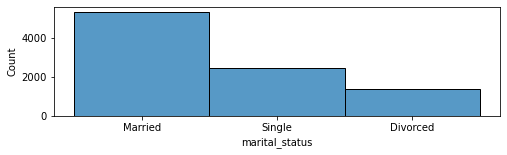

In [98]:
# marital status
print(data.marital_status.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.marital_status)
plt.show()

Suburban    0.632691
Rural       0.194110
Urban       0.173199
Name: location_code, dtype: float64


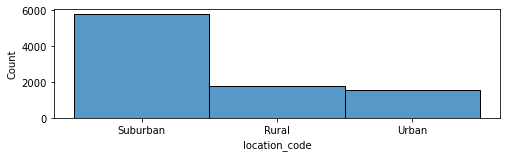

In [99]:
# location code
print(data.location_code.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.location_code)
plt.show()

## Insurance KPIs

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64


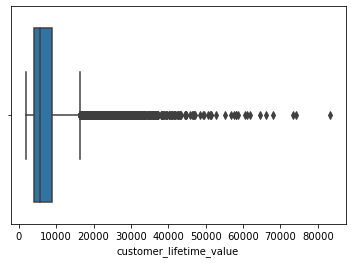

In [93]:
# customer lifetime value
print(data['customer_lifetime_value'].describe())
sns.boxplot(x=data['customer_lifetime_value'])
plt.show()

#### quite a few outliers but most customers with lifetime value below 10.000

Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: coverage, dtype: float64


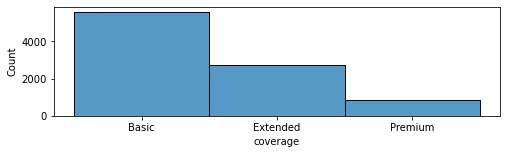

In [94]:
# coverage
print(data.coverage.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.coverage)
plt.show()

#### most customers with basic coverage, only very few premium

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64


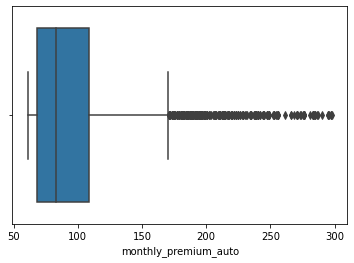

In [101]:
# monthly_premium_auto
print(data['monthly_premium_auto'].describe())
sns.boxplot(x=data['monthly_premium_auto'])
plt.show()

#### most customers pay max of 170 per month for coverage

In [102]:
#checking monthly premium by coverage
data.groupby(['coverage'])['monthly_premium_auto'].describe()

,count,mean,std,min,25%,50%,75%,max
coverage,,,,,,,,
Basic,5568.0,82.173851,27.364519,61.0,65.0,70.0,102.0,199.0
Extended,2742.0,103.579504,31.689253,76.0,84.0,92.0,123.0,249.0
Premium,824.0,133.381068,43.936499,101.0,107.0,114.0,152.0,298.0


#### there are outliers of monthly premium within each coverage category but in general premium is higher the higher the coverage category

Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: policy_type, dtype: float64


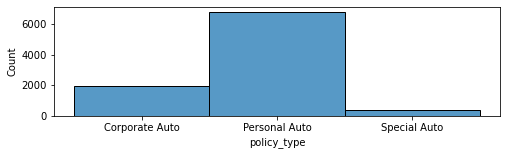

In [104]:
#policy
print(data.policy_type.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.policy_type)
plt.show()

In [107]:
#policy
pd.crosstab(data['policy_type'], data['policy'], normalize='index')

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,0.182419,0.302337,0.515244,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Personal Auto,0.000000,0.000000,0.000000,0.182675,0.31261,0.504714,0.000000,0.000000,0.000000
Special Auto,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.174603,0.433862,0.391534


#### for personal and corporate, policy  L3 is most popular, followed by L2 and then L1. For special auto, L2 with slightly higher frequency than L3

1    0.355923
2    0.251150
3    0.127874
7    0.047405
9    0.045544
4    0.044778
5    0.044559
8    0.042041
6    0.040727
Name: number_of_policies, dtype: float64


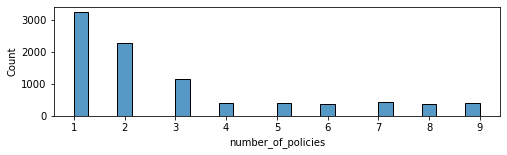

In [114]:
#number of policies
print(data.number_of_policies.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.number_of_policies)
plt.show()

0    0.793957
1    0.110685
2    0.040946
3    0.031968
4    0.016313
5    0.006131
Name: number_of_open_complaints, dtype: float64


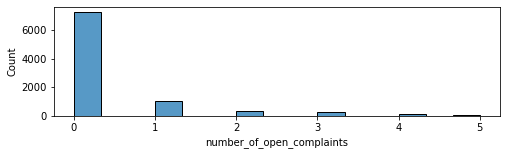

In [116]:
# number_of_open_complaints
print(data.number_of_open_complaints.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.number_of_open_complaints)
plt.show()

#### 80% of customers have no open complaints

#### most customers have more than one policy - unclear, what that means - more than one within same company, more than one of same type of policy... assuming that data in table is only for one policy, for one car - the one named in column "policy"

Four-Door Car    0.505912
Two-Door Car     0.206481
SUV              0.196628
Sports Car       0.052989
Luxury SUV       0.020145
Luxury Car       0.017845
Name: vehicle_class, dtype: float64


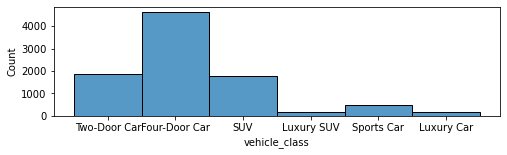

In [108]:
#vehicle class
print(data.vehicle_class.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.vehicle_class)
plt.show()

#### about 50% of customers drive four-door-car

Medsize    0.703306
Small      0.193125
Large      0.103569
Name: vehicle_size, dtype: float64


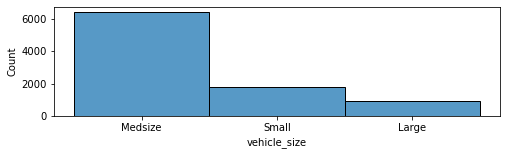

In [109]:
#vehicle size
print(data.vehicle_size.value_counts(normalize = True))
plt.figure(figsize=(8,2))
sns.histplot(data.vehicle_size)
plt.show()

#### most customers drive a medium sized car

In [113]:
pd.crosstab(data['vehicle_class'], data['vehicle_size'], normalize='index')

vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,0.102792,0.700498,0.196711
Luxury Car,0.098160,0.650307,0.251534
Luxury SUV,0.097826,0.679348,0.222826
SUV,0.092984,0.728285,0.178731
Sports Car,0.101240,0.756198,0.142562
Two-Door Car,0.117179,0.679745,0.203075


#### vehicle size does not depend much on vehicle_class